# Week 6 - question 1

In [1]:
from gurobipy import * # type: ignore
from gurobipy import quicksum, GRB # type: ignore

import matplotlib.pyplot as plt # type: ignore
from utils import *

Fifteen jobs, each with its processing time, should be scheduled on three machines.  <br>
If two jobs cannot be scheduled on the same machine, they are called conflicting jobs. <br><br>
Table 1 lists the job IDs, processing times, and sets of conflicting jobs. <br>
For example, we cannot schedule any pair of jobs out of jobs 2, 5, 8 on the same machine. <br>
Note that a job may have no conflicting jobs. 

<style>
    p, table {
        font-size: 14px;
    }
    table, tr, th, td {
        padding: -2px;
    }
</style>

<table>
    <thead>
        <tr>
            <th scope="col"><p><span>Job</span></p></th>
            <th scope="col"><p><span>Processing time</span></p></th>
            <th scope="col"><p><span>Conflicting jobs</span></p></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><p><span>1</span></p></td>
            <td><p><span>7</span></p></td>
            <td><p><span>None</span></p></td>
        </tr>
        <tr>
            <td><p><span>2</span></p></td>
            <td><p><span>4</span></p></td>
            <td><p><span>5, 8</span></p></td>
        </tr>
        <tr>
            <td><p><span>3</span></p></td>
            <td><p><span>6</span></p></td>
            <td><p><span>None</span></p></td>
        </tr>
        <tr>
            <td><p><span>4</span></p></td>
            <td><p><span>9</span></p></td>
            <td><p><span>None</span></p></td>
        </tr>
        <tr>
            <td><p><span>5</span></p></td>
            <td><p><span>12</span></p></td>
            <td><p><span>2, 8</span></p></td>
        </tr>
        <tr>
            <td><p><span>6</span></p></td>
            <td><p><span>8</span></p></td>
            <td><p><span>9</span></p></td>
        </tr>
        <tr>
            <td><p><span>7</span></p></td>
            <td><p><span>10</span></p></td>
            <td><p><span>10</span></p></td>
        </tr>
        <tr>
            <td><p><span>8</span></p></td>
            <td><p><span>11</span></p></td>
            <td><p><span>2, 5</span></p></td>
        </tr>
        <tr>
            <td><p><span>9</span></p></td>
            <td><p><span>8</span></p></td>
            <td><p><span>6</span></p></td>
        </tr>
        <tr>
            <td><p><span>10</span></p></td>
            <td><p><span>7</span></p></td>
            <td><p><span>7</span></p></td>
        </tr>
        <tr>
            <td><p><span>11</span></p></td>
            <td><p><span>6</span></p></td>
            <td><p><span>15</span></p></td>
        </tr>
        <tr>
            <td><p><span>12</span></p></td>
            <td><p><span>8</span></p></td>
            <td><p><span>None</span></p></td>
        </tr>
        <tr>
            <td><p><span>13</span></p></td>
            <td><p><span>15</span></p></td>
            <td><p><span>None</span></p></td>
        </tr>
        <tr>
            <td><p><span>14</span></p></td>
            <td><p><span>14</span></p></td>
            <td><p><span>None</span></p></td>
        </tr>
        <tr>
            <td><p><span>15</span></p></td>
            <td><p><span>3</span></p></td>
            <td><p><span>11</span></p></td>
        </tr>
    </tbody>
</table>

We want to schedule the jobs to minimize makespan. <br>
For example:
- We may schedule jobs 1, 4, 7, 8, and 13 to machine 1.
- Jobs 2, 6, 10, 11, and 14 to machine 2.
- Jobs 3, 5, 9, 12, and 15 to machine 3.

The total processing times on the three machines are 52, 39, and 37, respectively. <br>
The makespan is thus 52. While this is a feasible schedule, this may or may not be an optimal schedule. <br>
When we try to improve the schedule, be careful about conflicting jobs. <br><br>
For example, we cannot exchange jobs 8 and 11 (even though this reduces the makespan) because that will result in machine 2 processing conflicting jobs 2 and 8, which is infeasible. <br><br>

Formulate a linear integer program that generates a feasible schedule to minimize makespan. <br>
Then write a computer program (e.g., using Python to invoke Gurobi Optimizer) to solve this instance and obtain an optimal schedule. <br>
Write down the minimized makespan (i.e. the objective value of an optimal solution). <br><br>

Do not have any symbol other than numeric values in your answer.

## MILP Formulation

In [2]:
# create model instance
model = Model()

Restricted license - for non-production use only - expires 2026-11-23


In [3]:
# set of machines - (m)
m = [1, 2, 3]

# set of jobs and their processing times - (j)
j = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [4]:
for job in j:
    print(job)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [5]:
type(m), type(j)

(list, list)

In [6]:
# processing times - (j, p_j)
p_j = {
    1: 7,
    2: 4,
    3: 6,
    4: 9,
    5: 12,
    6: 8,
    7: 10,
    8: 11,
    9: 8,
    10: 7,
    11: 6,
    12: 8,
    13: 15,
    14: 14,
    15: 3
}

# set of conflicting jobs (j1, j2)
c_jj = {
    2: [5, 8],
    5: [2, 8],
    6: [9],
    7: [10],
    8: [2, 5],
    9: [6],
    10: [7],
    11: [15],
    15: [11]
}

In [7]:
type(p_j), type(c_jj)

(dict, dict)

In [8]:
# ==== VARIABLES ====
# Add job j to machine m or not
x = model.addVars(j, m, vtype=GRB.BINARY, name='x')

# max load on machine - Sets a ceiling which then slowly reduces ensuring that the machine with the highest load is always reduced first
C_max = model.addVar(vtype=GRB.CONTINUOUS, name="C_max")

In [9]:
# ==== CONSTRAINTS ====

# 1. each job is assigned to exactly one machine
for job in j:
    model.addConstr(quicksum(x[job, machine] for machine in m) == 1)

# 2. no two conflicting jobs are assigned to the same machine
for j1, conflicts in c_jj.items():
    for j2 in conflicts:
        if j1 < j2:  # Avoid duplicate constraints
            for machine in m:
                model.addConstr(x[j1, machine] + x[j2, machine] <= 1)

# 3. C_max is the maximum load on any machine
for machine in m:
    model.addConstr(quicksum(p_j[job] * x[job, machine] for job in j) <= C_max)

In [10]:
# show constraints equations
for j1, conflicts in c_jj.items():
    for j2 in conflicts:
        if j1 < j2:
            for m_ in m:
                print(f'x[{j1}, {m_}] + x[{j2}, {m_}] <= 1')

x[2, 1] + x[5, 1] <= 1
x[2, 2] + x[5, 2] <= 1
x[2, 3] + x[5, 3] <= 1
x[2, 1] + x[8, 1] <= 1
x[2, 2] + x[8, 2] <= 1
x[2, 3] + x[8, 3] <= 1
x[5, 1] + x[8, 1] <= 1
x[5, 2] + x[8, 2] <= 1
x[5, 3] + x[8, 3] <= 1
x[6, 1] + x[9, 1] <= 1
x[6, 2] + x[9, 2] <= 1
x[6, 3] + x[9, 3] <= 1
x[7, 1] + x[10, 1] <= 1
x[7, 2] + x[10, 2] <= 1
x[7, 3] + x[10, 3] <= 1
x[11, 1] + x[15, 1] <= 1
x[11, 2] + x[15, 2] <= 1
x[11, 3] + x[15, 3] <= 1


In [11]:
# ==== Objective function ===== 
# minimize makespan of the longest machine to finish all jobs
model.setObjective(C_max, GRB.MINIMIZE)

In [12]:
# Optimize the model
model.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (win64 - Windows 10.0 (19045.2))

CPU model: AMD Ryzen 5 5600G with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 36 rows, 46 columns and 129 nonzeros
Model fingerprint: 0x1e047281
Variable types: 1 continuous, 45 integer (45 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 72.0000000
Presolve removed 6 rows and 0 columns
Presolve time: 0.00s
Presolved: 30 rows, 46 columns, 120 nonzeros
Variable types: 0 continuous, 46 integer (45 binary)

Root relaxation: objective 4.266667e+01, 26 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0   

In [22]:
# model solve time
print(f'Model solve time: {model.Runtime}')

Model solve time: 0.019999980926513672


In [13]:
# Print the solution - show the assignment of jobs to machines
for job in j:
    for machine in m:
        if x[job, machine].x > 0.5:
            print(f'Job {job} is assigned to machine {machine}')

Job 1 is assigned to machine 3
Job 2 is assigned to machine 3
Job 3 is assigned to machine 2
Job 4 is assigned to machine 2
Job 5 is assigned to machine 1
Job 6 is assigned to machine 1
Job 7 is assigned to machine 2
Job 8 is assigned to machine 2
Job 9 is assigned to machine 3
Job 10 is assigned to machine 3
Job 11 is assigned to machine 2
Job 12 is assigned to machine 1
Job 13 is assigned to machine 1
Job 14 is assigned to machine 3
Job 15 is assigned to machine 3


In [14]:
# create a chart of the schedule

# sort jobs by machine
jobs_by_machine = {machine: [] for machine in m}
for job in j:
    for machine in m:
        if x[job, machine].x > 0.5:
            jobs_by_machine[machine].append(job)

# create bar char showing total processing time for each machine
machines = list(jobs_by_machine.keys())
machine_loads = [sum(p_j[job] for job in jobs_by_machine[machine]) for machine in machines]


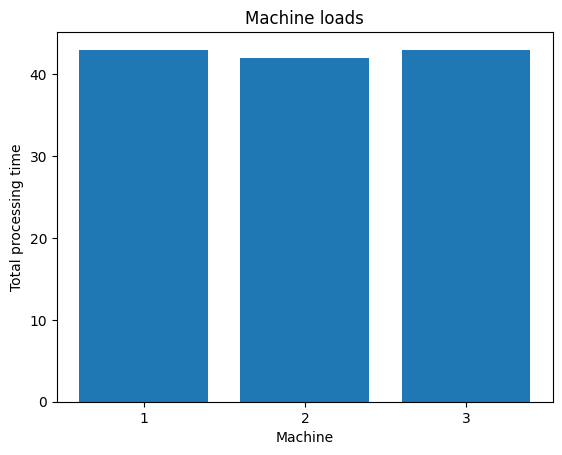

In [15]:
plot_schedule(m, machine_loads)

In [16]:
# total makespan
print(f'Total makespan: {C_max.x}')

Total makespan: 43.0


## Heuristic solution 
- assigns jobs to machines in order of their processing time (shortest first) 
- and then assigns the next job to the machine with the smallest load so far (greedy approach) if no conflicts
- if there is a tie then the machine with the smallest number is chosen

In [17]:
# sort jobs by processing time
sorted_jobs = sorted(j, key=lambda job: p_j[job])
sorted_jobs

[15, 2, 3, 11, 1, 10, 6, 9, 12, 4, 7, 8, 5, 14, 13]

In [18]:
%%time

# empty dictionary for each job to be assigned to each machine
jobs_by_machine = {job: [] for job in j}

# count total load on each machine
machine_loads = {machine: 0 for machine in m}

# list of jobs on each machine
machine_jobs = {machine: [] for machine in m}

# assign jobs to machines
for job in sorted_jobs:
    # find the machine with the smallest load - if there is a tie, choose the machine with the smallest number
    min_load = min(machine_loads.values())

    # find all machines with the smallest load - select the one with the smallest number
    min_load_machines = [machine for machine, load in machine_loads.items() if load == min_load]

    # check if there are any conflicts
    conflicts = [conflict for conflict in c_jj.get(job, []) if conflict in jobs_by_machine]
    print(f'**Conflicts for job {job}: {conflicts}')
    if not conflicts:
        # no conflicts - assign job to machine with smallest load
        machine = min(min_load_machines)
        jobs_by_machine[job] = machine
        machine_loads[machine] += p_j[job]
        machine_jobs[machine].append(job)
    else:
        # conflicts - assign job to machine with smallest load that does not have contain jobs in conflict
        for machine in m:
            if machine not in [jobs_by_machine[conflict] for conflict in conflicts]:
                jobs_by_machine[job] = machine
                machine_loads[machine] += p_j[job]
                machine_jobs[machine].append(job)
                break
    # print(f'Job {job} is assigned to machine {jobs_by_machine[job]}\n')

# do a local search to improve the solution
# randomly swap jobs between machines from the highest load machine to the lowest load machine if no conflicts are created until no further improvement is possible

current_max_load = max(machine_loads.values())

max_load_machine = max(machine_loads, key=machine_loads.get)
min_load_machine = min(machine_loads, key=machine_loads.get)

# print initial solution
print('Initial solution')
for machine, jobs in machine_jobs.items():
    print(f'Machine {machine}: {jobs}')
    print(f'Total load: {machine_loads[machine]}')

# move jobs from max_load_machine to min_load_machine if it results in lower max load and no conflicts are created

for job in machine_jobs[max_load_machine]:
    # check if job can be moved
    if all(conflict not in machine_jobs[min_load_machine] for conflict in c_jj.get(job, [])):
        if c_jj.get(job, []) == []:
            continue
        
        # check if moving the job reduces the makespan
        temp_loads = machine_loads.copy()
        temp_jobs = machine_jobs.copy()
        temp_loads[min_load_machine] += p_j[job]
        temp_loads[max_load_machine] -= p_j[job]
        temp_max_load = max(temp_loads.values())

        # move job from max_load_machine to min_load_machine
        temp_jobs[min_load_machine].append(job)
        temp_jobs[max_load_machine].remove(job)
        temp_loads[min_load_machine] += p_j[job]
        temp_loads[max_load_machine] -= p_j[job]

        # check if new solution is better
        if temp_max_load < current_max_load:
            # update current max load
            current_max_load = temp_max_load
            
            # update machine_jobs and machine_loads
            machine_loads = temp_loads
            machine_jobs = temp_jobs

            # find new max_load_machine and min_load_machine
            max_load_machine = max(machine_loads, key=machine_loads.get)
            min_load_machine = min(machine_loads, key=machine_loads.get)

# print final solution
print('Final solution')
for machine, jobs in machine_jobs.items():
    print(f'Machine {machine}: {jobs}')
    print(f'Total load: {machine_loads[machine]}')

**Conflicts for job 15: [11]
**Conflicts for job 2: [5, 8]
**Conflicts for job 3: []
**Conflicts for job 11: [15]
**Conflicts for job 1: []
**Conflicts for job 10: [7]
**Conflicts for job 6: [9]
**Conflicts for job 9: [6]
**Conflicts for job 12: []
**Conflicts for job 4: []
**Conflicts for job 7: [10]
**Conflicts for job 8: [2, 5]
**Conflicts for job 5: [2, 8]
**Conflicts for job 14: []
**Conflicts for job 13: []
Initial solution
Machine 1: [15, 2, 10, 6, 14, 13]
Total load: 51
Machine 2: [3, 11, 9, 7, 8]
Total load: 41
Machine 3: [1, 12, 4, 5]
Total load: 36
Final solution
Machine 1: [2, 10, 6, 14, 13]
Total load: 45
Machine 2: [3, 11, 9, 7, 8]
Total load: 41
Machine 3: [1, 12, 4, 5, 15]
Total load: 42
CPU times: total: 0 ns
Wall time: 1e+03 μs


In [19]:
machine_jobs

{1: [2, 10, 6, 14, 13], 2: [3, 11, 9, 7, 8], 3: [1, 12, 4, 5, 15]}

In [20]:
# change machine_loads to list only take the values
machine_loads = [machine_loads[machine] for machine in m]
machine_loads

[45, 41, 42]

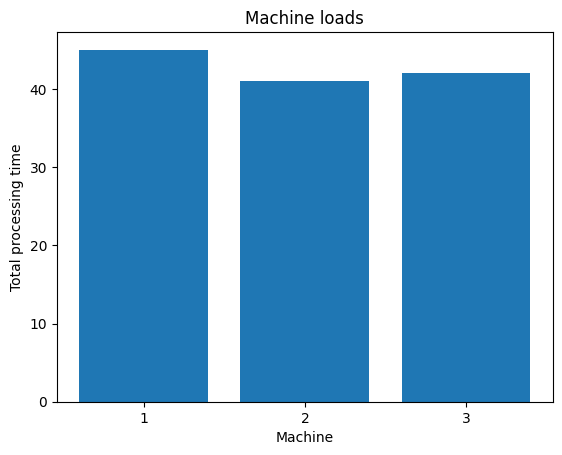

In [21]:
plot_schedule(machines, machine_loads)

Gurobi solve time : 0.02 s , Makespan = 43 <br>
Heuristics : 0.001 s , Makespan = 45